In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cleanreviewdataset/Review_Corpus.csv


# Stage1. Polarity Overview
The key aspect of `sentiment analysis` is to analyze a body of text for understanding the opinion expressed by it. Typically, we quantify this sentiment with a positive or negative value, called **`polarity`**. The overall sentiment is often inferred as `positive`, `neutral` or `negative` from the sign of the polarity score.

Typically, `sentiment analysis` for text data can be computed on several levels, including on an individual `sentence level`, `paragraph level`, or the entire `document` as a whole.

## There are two major approaches to sentiment analysis.
* Supervised machine learning or deep learning approaches 
* Unsupervised lexicon-based approaches 

## Various popular lexicons are used for sentiment analysis, including the following.
* AFINN lexicon 
* SentiWordNet
* VADER lexicon
* TextBlob lexicon 

`We will try AFINN and TextBlob with our Review Dataset.`

# Stage2. Import Dependencies

In [5]:
!pip install Afinn

     |████████████████████████████████| 52 kB 136 kB/s eta 0:00:011
  Created wheel for Afinn: filename=afinn-0.1-py3-none-any.whl size=53449 sha256=121d8635a135954e3c9bf41ea357ca162580aaf3a4ecb807594507f0a3621fa7
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built Afinn
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [6]:
from textblob import TextBlob
from afinn import Afinn
import pandas as pd

# Stage3. Load Clean Review File.

In [7]:
df=pd.read_csv('/kaggle/input/cleanreviewdataset/Review_Corpus.csv')
pd.set_option('display.max_colwidth', -1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [8]:
df.head()

,Restaurant,description
0,Fable,recommendation make reservation pork rib special night crispy halibut salad fat tug oyster chickpea fritter smoker frazier duck breast they switch up menu because they are farm table restaurant which make nice since you can get variety alcohol also farm table you will not find tour typical brand hard liquor
1,Fable,could not ask more slow night restaurant they about close but accommodated u we very hungry but not wanted eat heavy we ordered chickpea fritter n beet salad n omg my best chickpea fritter ever heavenly fresh n soft eat beet salad even better guess fresh ingredient flavoured well in fact there many food item tempted eat but not watch my big growing stomach forgot name my cocktail but delicious n refreshing there are good desert well like cheesecake toffee caramel truffle loved ambience n decor inside peck clean n covid precaution taken staff very gracious n smiling would love go back try duck dish
2,Fable,whoa it s been and wait worth now vegan it s been hard find really good place fancy pant dining am in love with place food everything perfect and it s got everything from vegan vegetarian and blood eater alike dish start chickpea fritter chickpea and plant based eater it s happy marriage they come single and could eaten meal and roasted beet yummy they had pasta special vegan which pesto and pea shoot plate fantastic love my green give plate full green i m super happy my pescatarian love ordered salmon dish which also sounded amazing except weird combination chorizo in thought should add should not plate could missed not paying attention not surprise non meat eater would appreciate eaten in little bit everyone price are little bit high but would definitely back date
3,Fable,came brunch date saturday around noon and got seated right away but we definitely got last open seat in restaurant you re coming prepared start getting crowded around then liked how they sweet and savory option their menu they offer variety different egg benedict we opted their traditional egg benny and their french toast good however portion size little small what you re paying egg benny perfectly done yolk runny and flavor good really liked these rostis thats side it like flattened tater tot crispy goodness their french toast one thicc slab bread topped with mascarpone cream farm fresh berry and candied walnut dish little too sweet my liking really impressed with bread toast very caramelized outside but inside very soft felt like we eating dessert haha their staff kind and patient and helpful ambiance in restaurant definitely comfortable yet little fancy and could romantic meal too
4,Fable,there are many brunch spot stretch th ave and fable one better option they recently expanded their menu include frittata and toast avocado blt etc sampled veggie frittata with creamy goat cheese asparagus and healthy pile green top served with delicious potato r sti side toast and housemade raspberry jam component came together beautifully and r sti are more like sophisticated flattened tater tot in best possible way darling show in my book along with fresh raspberry jam service warm and efficient frittata are listed taking minute menu but everything seemed served up with speed restaurant can seem bit dark especially you re seated near back but in experience worth repeating in my book total bill with tax and tip came out about which again vancouver s magic number brunch lunch sans drink


# Stage4. Sentiment Analysis with Lexicon (Unsupervised-Approach)

## 4.1 Sentiment Analysis with AFINN Lexicon
* The current version of the lexicon is AFINN-en-165.txt and it contains over 3,300+ words with a polarity score associated with each word.

In [9]:
# initialize afinn sentiment analyzer
af = Afinn()

# compute sentiment scores (polarity) and labels
sentiment_scores = [af.score(each) for each in df['description']]
sentiment_category = ['positive' if score > 0 
                          else 'negative'
                              for score in sentiment_scores]
    
# Convert sentiment_score and sentiment_category in Series and add in DF.
df['sentiment_score_af']=pd.Series(sentiment_scores).T
df['sentiment_category_af']=pd.Series(sentiment_category).T

In [10]:
df.head()

,Restaurant,description,sentiment_score_af,sentiment_category_af
0,Fable,recommendation make reservation pork rib special night crispy halibut salad fat tug oyster chickpea fritter smoker frazier duck breast they switch up menu because they are farm table restaurant which make nice since you can get variety alcohol also farm table you will not find tour typical brand hard liquor,2.0,positive
1,Fable,could not ask more slow night restaurant they about close but accommodated u we very hungry but not wanted eat heavy we ordered chickpea fritter n beet salad n omg my best chickpea fritter ever heavenly fresh n soft eat beet salad even better guess fresh ingredient flavoured well in fact there many food item tempted eat but not watch my big growing stomach forgot name my cocktail but delicious n refreshing there are good desert well like cheesecake toffee caramel truffle loved ambience n decor inside peck clean n covid precaution taken staff very gracious n smiling would love go back try duck dish,33.0,positive
2,Fable,whoa it s been and wait worth now vegan it s been hard find really good place fancy pant dining am in love with place food everything perfect and it s got everything from vegan vegetarian and blood eater alike dish start chickpea fritter chickpea and plant based eater it s happy marriage they come single and could eaten meal and roasted beet yummy they had pasta special vegan which pesto and pea shoot plate fantastic love my green give plate full green i m super happy my pescatarian love ordered salmon dish which also sounded amazing except weird combination chorizo in thought should add should not plate could missed not paying attention not surprise non meat eater would appreciate eaten in little bit everyone price are little bit high but would definitely back date,33.0,positive
3,Fable,came brunch date saturday around noon and got seated right away but we definitely got last open seat in restaurant you re coming prepared start getting crowded around then liked how they sweet and savory option their menu they offer variety different egg benedict we opted their traditional egg benny and their french toast good however portion size little small what you re paying egg benny perfectly done yolk runny and flavor good really liked these rostis thats side it like flattened tater tot crispy goodness their french toast one thicc slab bread topped with mascarpone cream farm fresh berry and candied walnut dish little too sweet my liking really impressed with bread toast very caramelized outside but inside very soft felt like we eating dessert haha their staff kind and patient and helpful ambiance in restaurant definitely comfortable yet little fancy and could romantic meal too,40.0,positive
4,Fable,there are many brunch spot stretch th ave and fable one better option they recently expanded their menu include frittata and toast avocado blt etc sampled veggie frittata with creamy goat cheese asparagus and healthy pile green top served with delicious potato r sti side toast and housemade raspberry jam component came together beautifully and r sti are more like sophisticated flattened tater tot in best possible way darling show in my book along with fresh raspberry jam service warm and efficient frittata are listed taking minute menu but everything seemed served up with speed restaurant can seem bit dark especially you re seated near back but in experience worth repeating in my book total bill with tax and tip came out about which again vancouver s magic number brunch lunch sans drink,23.0,positive


In [11]:
df['sentiment_category_af'].value_counts()

positive    1689
negative    54  
Name: sentiment_category_af, dtype: int64

In [12]:
df.groupby(by=['sentiment_category_af']).describe()

sentiment_score_af                                   \
                                   count       mean        std   min  25%   
sentiment_category_af                                                       
negative               54.0              -2.018519   3.153260  -19.0 -3.0   
positive               1689.0             17.098283  13.834878  1.0   8.0   

                                          
                        50%   75%    max  
sentiment_category_af                     
negative              -1.0   0.0   0.0    
positive               13.0  22.0  161.0

### As above we can see we have 1689 positive, 54 negative reviews in our df, by using AFFIN Lexicon.

## 4.2 Sentiment Analysis with TextBlob
* `TextBlob` is another excellent open-source library for performing NLP tasks with ease, including sentiment analysis. 
* It also an a `sentiment lexicon` (in the form of an XML file) which it leverages to give both `polarity and subjectivity` scores.
* The `polarity score` is a float within the range [-1.0, 1.0]. 
* The `subjectivity` is a float within the range [0.0, 1.0] where 0.0 is very `objective` and 1.0 is very `subjective`.

In [13]:
# compute sentiment scores (polarity) and labels
sentiment_scores_tb = [round(TextBlob(each).sentiment.polarity, 3) for each in df['description']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative'
                                     for score in sentiment_scores_tb]


# Convert sentiment_score and sentiment_category in Series and add in DF.
df['sentiment_score_tb']=pd.Series(sentiment_scores_tb).T
df['sentiment_category_tb']=pd.Series(sentiment_category_tb).T

In [14]:
df.head()

,Restaurant,description,sentiment_score_af,sentiment_category_af,sentiment_score_tb,sentiment_category_tb
0,Fable,recommendation make reservation pork rib special night crispy halibut salad fat tug oyster chickpea fritter smoker frazier duck breast they switch up menu because they are farm table restaurant which make nice since you can get variety alcohol also farm table you will not find tour typical brand hard liquor,2.0,positive,0.125,positive
1,Fable,could not ask more slow night restaurant they about close but accommodated u we very hungry but not wanted eat heavy we ordered chickpea fritter n beet salad n omg my best chickpea fritter ever heavenly fresh n soft eat beet salad even better guess fresh ingredient flavoured well in fact there many food item tempted eat but not watch my big growing stomach forgot name my cocktail but delicious n refreshing there are good desert well like cheesecake toffee caramel truffle loved ambience n decor inside peck clean n covid precaution taken staff very gracious n smiling would love go back try duck dish,33.0,positive,0.361,positive
2,Fable,whoa it s been and wait worth now vegan it s been hard find really good place fancy pant dining am in love with place food everything perfect and it s got everything from vegan vegetarian and blood eater alike dish start chickpea fritter chickpea and plant based eater it s happy marriage they come single and could eaten meal and roasted beet yummy they had pasta special vegan which pesto and pea shoot plate fantastic love my green give plate full green i m super happy my pescatarian love ordered salmon dish which also sounded amazing except weird combination chorizo in thought should add should not plate could missed not paying attention not surprise non meat eater would appreciate eaten in little bit everyone price are little bit high but would definitely back date,33.0,positive,0.257,positive
3,Fable,came brunch date saturday around noon and got seated right away but we definitely got last open seat in restaurant you re coming prepared start getting crowded around then liked how they sweet and savory option their menu they offer variety different egg benedict we opted their traditional egg benny and their french toast good however portion size little small what you re paying egg benny perfectly done yolk runny and flavor good really liked these rostis thats side it like flattened tater tot crispy goodness their french toast one thicc slab bread topped with mascarpone cream farm fresh berry and candied walnut dish little too sweet my liking really impressed with bread toast very caramelized outside but inside very soft felt like we eating dessert haha their staff kind and patient and helpful ambiance in restaurant definitely comfortable yet little fancy and could romantic meal too,40.0,positive,0.236,positive
4,Fable,there are many brunch spot stretch th ave and fable one better option they recently expanded their menu include frittata and toast avocado blt etc sampled veggie frittata with creamy goat cheese asparagus and healthy pile green top served with delicious potato r sti side toast and housemade raspberry jam component came together beautifully and r sti are more like sophisticated flattened tater tot in best possible way darling show in my book along with fresh raspberry jam service warm and efficient frittata are listed taking minute menu but everything seemed served up with speed restaurant can seem bit dark especially you re seated near back but in experience worth repeating in my book total bill with tax and tip came out about which again vancouver s magic number brunch lunch sans drink,23.0,positive,0.348,positive


## Sentiment Category counts by Affin and TextBlob Lexicons.

In [15]:
# Value counts of sentiment with Affin
df['sentiment_category_af'].value_counts()

positive    1689
negative    54  
Name: sentiment_category_af, dtype: int64

In [16]:
# Value counts of sentiments with TextBlob
df['sentiment_category_tb'].value_counts()

positive    1670
negative    73  
Name: sentiment_category_tb, dtype: int64

## Filter Data with negative labels in Affin sentiment Category.

In [17]:
temp=df[df['sentiment_category_af']=='negative']

# show review and sentiment category of Affin and TextBlob only for negative data.
temp[['description','sentiment_category_af','sentiment_category_tb']].head()

,description,sentiment_category_af,sentiment_category_tb
133,unfortunately fairly large group seated time with u small child sometimes running around and screaming not quite what expecting friday night dinner th ave price point person our server quite honest and apologized delay our service due large group comp d appetizer dish which very generous think took almost min get our apps and maybe almost hour our main by time main finally came out had already lost my appetite from waiting also my duck breast rare side i m guessing because kitchen rushed catch up our order honestly would preferred eating somewhere else hostess accepted my reso told there wasn t availability my time slot because there large group our server however offer gift certificate come back which again very generous but i m not sure would go back alot hype restaurant but weak execution,negative,positive
187,i ve been twice dinner and would rate place problem i ve been twice brunch and my friend are not punctual good dinner good fresh food good service bad sigh they draconian application the seat only when table arrives policy and time i ve been there place not full first time empty and since not choice my non punctual friend host had stand in narrow entryway like bad kid in grade school could sat table whole time waited time happened and they had enough table and not mind give up my table they needed but no after brunch not good and crappy treatment might been part,negative,positive
235,yikes such awful experience firstly my husband had egg benedict special and violently ill short time after we left restaurant horrible experience say least grilled cheese made with oddly strange choice cheese had overpowering onion flavor and not melt properly people it s grilled cheese dish we tried fried chicken coating had lot flavor meat inside tasteless disappointing we came because high yelp review but either very bad day they ve changed cook management maybe warned,negative,negative
316,just ok we looking brunch place with new canadian fare and none u blown away not come hungry either because portion are thr smaller side,negative,positive
340,despite fact place practically empty they tried rush u order saying would fill up soon staff not friendly accommodating we wanted take dessert go and they refused pack ice cream up which mean we payed few crumbles brownie,negative,negative


## Filter Data with negative labels in TextBlob sentiment Category.

In [18]:
temp=df[df['sentiment_category_tb']=='negative']

# show review and sentiment category of Affin and TextBlob only for negative data.
temp[['description','sentiment_category_af','sentiment_category_tb']].head()

,description,sentiment_category_af,sentiment_category_tb
155,went sunday brunch with girlfriend very mediocre and ordinary food price no clue restaurant famous won t come back again,positive,negative
157,just had lunch with my coworkers and food very disappointing portion very small food tasteless wait long price expensive won t ever come back,positive,negative
158,o k egg benedict not good expected hollandaise very thick and not flavourful would like cosy interior and nice service,positive,negative
235,yikes such awful experience firstly my husband had egg benedict special and violently ill short time after we left restaurant horrible experience say least grilled cheese made with oddly strange choice cheese had overpowering onion flavor and not melt properly people it s grilled cheese dish we tried fried chicken coating had lot flavor meat inside tasteless disappointing we came because high yelp review but either very bad day they ve changed cook management maybe warned,negative,negative
296,egg in benny not runny disappointed atmosphere and service are good therefore star,positive,negative


## As above we can see first three row is negative but categories as positive in Affin model and negative in TextBlob.

## Convert Sentiment Category in Numeric form with LabelEncoder and add in df.

In [19]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df["tb_code"] = lb.fit_transform(df["sentiment_category_tb"])
df['af_code'] = lb.fit_transform(df['sentiment_category_af'])

In [20]:
# Check if Encoding happend correctly.
df[['tb_code','sentiment_category_tb','af_code','sentiment_category_af']]

,tb_code,sentiment_category_tb,af_code,sentiment_category_af
0,1,positive,1,positive
1,1,positive,1,positive
2,1,positive,1,positive
3,1,positive,1,positive
4,1,positive,1,positive
...,...,...,...,...
1738,1,positive,1,positive
1739,1,positive,1,positive
1740,1,positive,1,positive
1741,1,positive,1,positive


## Count of Reviews where labels equal in both Affin and TextBlob with Confusion Matrix.
### I will took TextBlob category as true value and Affin as predicted.

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np

In [22]:
actual=np.array(df['tb_code'])
predicted=np.array(df['af_code'])
results=confusion_matrix(actual,predicted)

In [23]:
print('Confusion Matrix :')
print(results)

Confusion Matrix :
[[  26   47]
 [  28 1642]]


In [24]:
print('\t\tpredicted(Affin)\n')
print('\t\t\tneg \t pos')
print('actual(TextBlob)neg\t 26\t 47')
print('\n\t\tpos\t 28\t 1642')

		predicted(Affin)

			neg 	 pos
actual(TextBlob)neg	 26	 47

		pos	 28	 1642


## Conclusion
* we have 26 common negative review in both Affin and TextBlob
* we have 1642 common positive review in both Affin and TextBlob.
* we have 28 which are positive in TextBlob and negative in Affin.
* we have 47 review which are negative in TextBlob but positive in Affin.

## Equality is 96% which means 96% review category same in both Affin and TextBlob predicted category.

In [25]:
print(f'Equality Score: {round(accuracy_score(actual,predicted),2)*100}%')
print(f'\nReport: \n{classification_report(actual,predicted)}')

Equality Score: 96.0%

Report: 
              precision    recall  f1-score   support

           0       0.48      0.36      0.41        73
           1       0.97      0.98      0.98      1670

    accuracy                           0.96      1743
   macro avg       0.73      0.67      0.69      1743
weighted avg       0.95      0.96      0.95      1743



## Seperate Data with Same category value in both Affin and TextBlob.

In [26]:
sameDF=df[df['tb_code']==df['af_code']]

In [27]:
sameDF.head()

,Restaurant,description,sentiment_score_af,sentiment_category_af,sentiment_score_tb,sentiment_category_tb,tb_code,af_code
0,Fable,recommendation make reservation pork rib special night crispy halibut salad fat tug oyster chickpea fritter smoker frazier duck breast they switch up menu because they are farm table restaurant which make nice since you can get variety alcohol also farm table you will not find tour typical brand hard liquor,2.0,positive,0.125,positive,1,1
1,Fable,could not ask more slow night restaurant they about close but accommodated u we very hungry but not wanted eat heavy we ordered chickpea fritter n beet salad n omg my best chickpea fritter ever heavenly fresh n soft eat beet salad even better guess fresh ingredient flavoured well in fact there many food item tempted eat but not watch my big growing stomach forgot name my cocktail but delicious n refreshing there are good desert well like cheesecake toffee caramel truffle loved ambience n decor inside peck clean n covid precaution taken staff very gracious n smiling would love go back try duck dish,33.0,positive,0.361,positive,1,1
2,Fable,whoa it s been and wait worth now vegan it s been hard find really good place fancy pant dining am in love with place food everything perfect and it s got everything from vegan vegetarian and blood eater alike dish start chickpea fritter chickpea and plant based eater it s happy marriage they come single and could eaten meal and roasted beet yummy they had pasta special vegan which pesto and pea shoot plate fantastic love my green give plate full green i m super happy my pescatarian love ordered salmon dish which also sounded amazing except weird combination chorizo in thought should add should not plate could missed not paying attention not surprise non meat eater would appreciate eaten in little bit everyone price are little bit high but would definitely back date,33.0,positive,0.257,positive,1,1
3,Fable,came brunch date saturday around noon and got seated right away but we definitely got last open seat in restaurant you re coming prepared start getting crowded around then liked how they sweet and savory option their menu they offer variety different egg benedict we opted their traditional egg benny and their french toast good however portion size little small what you re paying egg benny perfectly done yolk runny and flavor good really liked these rostis thats side it like flattened tater tot crispy goodness their french toast one thicc slab bread topped with mascarpone cream farm fresh berry and candied walnut dish little too sweet my liking really impressed with bread toast very caramelized outside but inside very soft felt like we eating dessert haha their staff kind and patient and helpful ambiance in restaurant definitely comfortable yet little fancy and could romantic meal too,40.0,positive,0.236,positive,1,1
4,Fable,there are many brunch spot stretch th ave and fable one better option they recently expanded their menu include frittata and toast avocado blt etc sampled veggie frittata with creamy goat cheese asparagus and healthy pile green top served with delicious potato r sti side toast and housemade raspberry jam component came together beautifully and r sti are more like sophisticated flattened tater tot in best possible way darling show in my book along with fresh raspberry jam service warm and efficient frittata are listed taking minute menu but everything seemed served up with speed restaurant can seem bit dark especially you re seated near back but in experience worth repeating in my book total bill with tax and tip came out about which again vancouver s magic number brunch lunch sans drink,23.0,positive,0.348,positive,1,1


## Seperate Data with Different category value in both Affin and TextBlob.

In [28]:
diffDF=df[df['tb_code']!=df['af_code']]

In [29]:
diffDF

,Restaurant,description,sentiment_score_af,sentiment_category_af,sentiment_score_tb,sentiment_category_tb,tb_code,af_code
133,Fable,unfortunately fairly large group seated time with u small child sometimes running around and screaming not quite what expecting friday night dinner th ave price point person our server quite honest and apologized delay our service due large group comp d appetizer dish which very generous think took almost min get our apps and maybe almost hour our main by time main finally came out had already lost my appetite from waiting also my duck breast rare side i m guessing because kitchen rushed catch up our order honestly would preferred eating somewhere else hostess accepted my reso told there wasn t availability my time slot because there large group our server however offer gift certificate come back which again very generous but i m not sure would go back alot hype restaurant but weak execution,0.0,negative,0.110,positive,1,0
155,Fable,went sunday brunch with girlfriend very mediocre and ordinary food price no clue restaurant famous won t come back again,4.0,positive,-0.100,negative,0,1
157,Fable,just had lunch with my coworkers and food very disappointing portion very small food tasteless wait long price expensive won t ever come back,1.0,positive,-0.376,negative,0,1
158,Fable,o k egg benedict not good expected hollandaise very thick and not flavourful would like cosy interior and nice service,3.0,positive,-0.060,negative,0,1
187,Fable,i ve been twice dinner and would rate place problem i ve been twice brunch and my friend are not punctual good dinner good fresh food good service bad sigh they draconian application the seat only when table arrives policy and time i ve been there place not full first time empty and since not choice my non punctual friend host had stand in narrow entryway like bad kid in grade school could sat table whole time waited time happened and they had enough table and not mind give up my table they needed but no after brunch not good and crappy treatment might been part,-3.0,negative,0.045,positive,1,0
...,...,...,...,...,...,...,...,...
1632,Jam Cafe on Beatty,fried chicken benny s winner winner chicken brunch wait worth,10.0,positive,-0.300,negative,0,1
1667,Jam Cafe on Beatty,service off and wait very long would okay they set right expectation minute turned into hour minute plus min get food that s before you actually start eat major expectation setting fail great hour breakfast what you expected but you had thing in mind you may end up having cancel those plan,0.0,negative,0.123,positive,1,0
1720,Jam Cafe on Beatty,crazy wait standing outside with cranky hungry kid silly not worth unless you nothing better bright saturday morning go running not sure what you d raining there isn t shelter in front cafe,2.0,positive,-0.043,negative,0,1
1734,Jam Cafe on Beatty,place amazing although still relatively new in town it s quickly become one our favourite brunch spot in city favourite dish include chicken french toast chicken and waffle pulled pork pancake caesar lover out there bourbonator with it candied bacon topping just heaven lineup can long get there early,10.0,positive,-0.010,negative,0,1


In [30]:
temp=df[df['af_code']==0]

## Import Dependencies for get most common words.

In [31]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import spacy
import en_core_web_sm  
nlp = en_core_web_sm.load()
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
def mcw(df,sc=['af_code','tb_code'],sv=[0,1]):
    """
    mcw is a function to get most common word.
    df is dataframe with we want to work, sc is columns name which we want to
    filter by their value. sv is value is columns which we will use to filter
    review and get most common words.
    """
    # result is df which keep output.
    result=pd.DataFrame()
    # outer loop (each column name in sc).
    for each in sc:
        # inner loop (each value in column).
        for v in sv:
            # filter df according value in column and assign in df.
           temp=df[df[each]==v]
            # Tokenize each row in Review column and assign in list.
           doc_list=[nlp(row) for row in temp['description']]
            # create tokens of each row where token is pos tag(adj,noun,verb,adv) type.
           tokens = [x.lemma_ for doc in doc_list for x in doc if x.pos_ in ['ADJ','NOUN','VERB','ADV']]
            # create dict with word and their count.
           c_labels=Counter(tokens)
            # select 30 most_common words.
           mc=c_labels.most_common(30)
            # create a temp df with most common words and their count
           d_f = pd.DataFrame(mc, columns =[each+'_'+str(v)+'_mcw', each+'_'+str(v)+'_count']) 
            # check if result df is blank so assign the d_f.
           if len(result)==0:
               result=d_f
            # else result df not blank so concat with d_f.
           else:
               result = pd.concat([result, d_f], axis=1)
    
    return result


           
            

In [33]:
# calling function mcw to get most common words.
result=mcw(df)
result.head()

,af_code_0_mcw,af_code_0_count,af_code_1_mcw,af_code_1_count,tb_code_0_mcw,tb_code_0_count,tb_code_1_mcw,tb_code_1_count
0,line,39,good,1417,wait,64,good,1410
1,wait,30,food,1379,line,51,food,1357
2,food,27,wait,1260,food,49,wait,1226
3,s,25,go,902,chicken,44,go,886
4,go,22,get,887,go,38,great,881


Columns Explanation:

1. af_code_0_mcw = Most Common Word in Affin Negative Review.
2. af_code_1_mcw = Most Common Word in Affin Positive Review.
3. tb_code_0_mcw = Most Common Word in TextBlob Negative Review.
4. tb_code_1_mcw = Most Common Word in TextBlob Positive Review.


## Combine the Affin and TextBlob (Positive,Negative) reviews Most common word.

In [35]:
# Add Most common words of Affin and TextBlob for Negative Reviews.
all_neg_MCW=list(result['af_code_0_mcw'])+list(result['tb_code_0_mcw'])
print(f'Total words: {len(all_neg_MCW)}')

# Remove duplicates with set
all_neg_MCW=list(set(all_neg_MCW))
print(f'Unique words: {len(all_neg_MCW)}')


Total words: 60
Unique words: 39


In [36]:
# Add Most common words of Affin and TextBlob for Positive Reviews.
all_pos_MCW=list(result['af_code_1_mcw'])+list(result['tb_code_1_mcw'])
print(f'Total words: {len(all_pos_MCW)}')

# Remove duplicates with set
all_pos_MCW=list(set(all_pos_MCW))
print(f'Unique words: {len(all_pos_MCW)}')


Total words: 60
Unique words: 31


# Most common word representation by Word Cloud.

In [37]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

mcw_pos = " ".join(all_pos_MCW)
mcw_neg = " ".join(all_neg_MCW)

sw = set(STOPWORDS) 

## Representaion of Positive reviews(Affin,TextBlob) most common words.

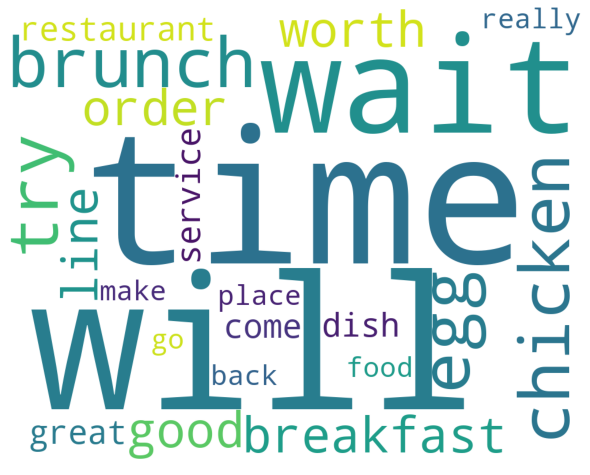

In [42]:
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords = sw, 
                min_font_size = 10).generate(mcw_pos) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## Representaion of Negative reviews(Affin,TextBlob) most common words.

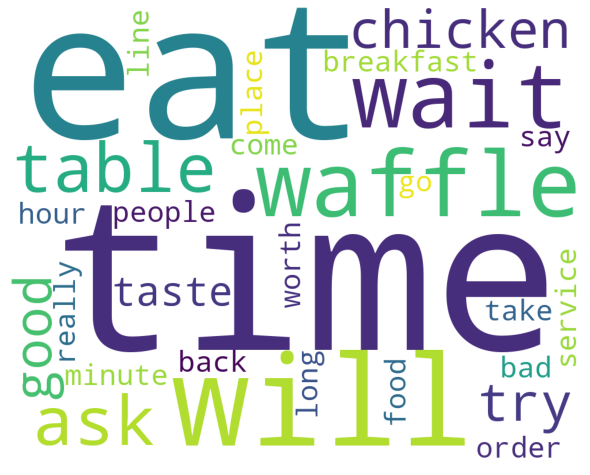

In [44]:
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color ='white', 
                stopwords = sw, 
                min_font_size = 10).generate(mcw_neg) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 